# Riddler Classic 2020-10-23

This week's **[Riddler column](https://fivethirtyeight.com/features/can-you-feed-the-hot-hand/)** gives the problem: 

Now that LeBron James and Anthony Davis have restored the Los Angeles Lakers to glory with their recent victory in the NBA Finals, suppose they decide to play a game of sudden-death, one-on-one basketball. They’ll flip a coin to see which of them has first possession, and whoever makes the first basket wins the game.

Both players have a 50 percent chance of making any shot they take. However, Davis is the superior rebounder and will always rebound any shot that either of them misses. Every time Davis rebounds the ball, he dribbles back to the three-point line before attempting another shot.

Before each of Davis’s shot attempts, James has a probability p of stealing the ball and regaining possession before Davis can get the shot off. What value of p makes this an evenly matched game of one-on-one, so that both players have an equal chance of winning before the coin is flipped?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
def find_win_probabilities(p):

    # Create transition matrix between each state
    M = np.array([
                   [0,1/2, 1/2,  0,  0,  0] # Coin flip
                  ,[0,  0, 1/2,  0,1/2,  0] # James shoots
                  ,[0,  p,   0,1-p,  0,  0] # Davis possesses
                  ,[0,  0, 1/2,  0,  0,1/2] # Davis shoots
                  ,[0,  0,   0,  0,  1,  0] # James wins
                  ,[0,  0,   0,  0,  0,  1] # Davis wins
                   ]) 

    # Find probability of absorption from each state
    I = np.eye(len(M) - 2)  
    Q = M[:-2, :-2]
    R = M[:-2,-2:]
    B = np.matmul(np.linalg.inv(I - Q), R)

    return B[0][0], B[0][1]
    
# Loop through probabilities of winning
result = [find_win_probabilities(p/100) for p in range(0,101)]

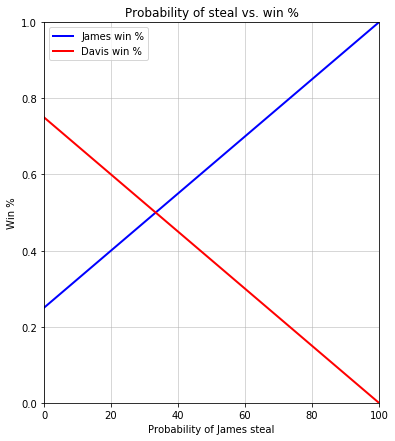

In [143]:
# Create graph

james = [i[0] for i in result]
davis = [i[1] for i in result]
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
plt.figure(figsize=(6, 7))      
  
# Plot
plt.ylim(0, 1)    
plt.xlim(0, 100)   
plt.plot(range(0,101),  james, lw=2, color="blue", alpha=1, label = 'James win %') 
plt.plot(range(0,101),  davis, lw=2, color="red", alpha=1, label = 'Davis win %') 

# Style
plt.xlabel('Probability of James steal')
plt.ylabel('Win %')
plt.title('Probability of steal vs. win %')
plt.grid(linestyle='-', linewidth=.5)
plt.legend()

#set the grid on
plt.show()


In [140]:
# Looks like 1/3, let's confirm

print(find_win_probabilities(1/3))

# 0.5, 0.5

(0.5, 0.5000000000000001)
